In [59]:
import os, glob
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np
from pathlib import PurePath
plt.style.use('dark_background')

Filename: /Users/rattie/Data/SDO/HMI/temp/2017_09_01/continuum/hmi.ic_45s.20170901_000045_TAI.2.continuum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 CompImageHDU    106   (4096, 4096)   int16   
(4096, 4096)


(-0.5, 4095.5, -0.5, 4095.5)

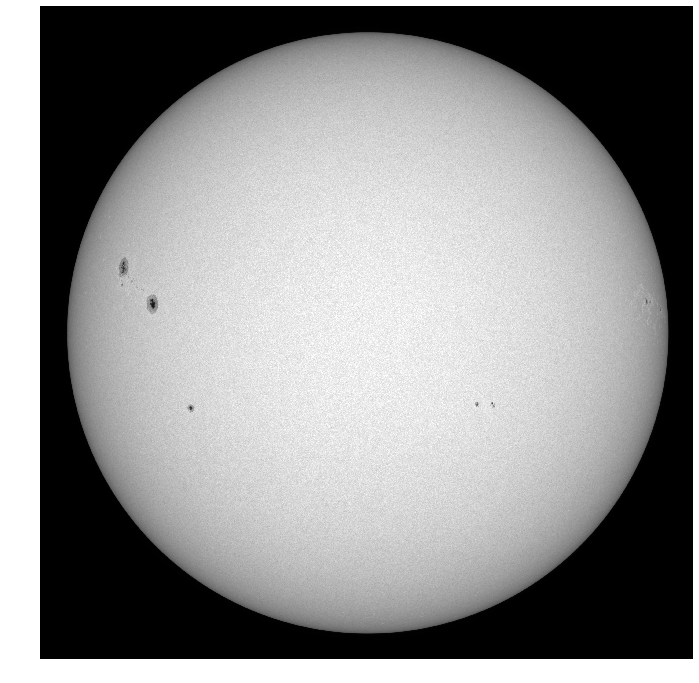

In [74]:
files = sorted(glob.glob('/Users/rattie/Data/SDO/HMI/temp/2017_09_01/continuum/hmi*.fits'))
hdul = fits.open(files[0])
hdul.info()
sample = hdul[1]
sample.verify('fix')
data = sample.data
h = hdul[1].header
h['CROTA2']
hdul.close()
print(data.shape)
if h['CROTA2'] > 100: 
    data = np.rot90(data, 2)

data[np.isnan(data)] = np.nanpercentile(data, 0.01)

%matplotlib inline
fig = plt.figure(figsize=(12, 12))
plt.imshow(data, vmin=np.nanpercentile(data, 0.01), vmax=np.nanpercentile(data, 99.9), origin='lower', cmap='gray')
plt.axis('off')

In [81]:
for i, f in enumerate(files):
    fpath = PurePath(f)
    with fits.open(f) as hdul:
        hdul = fits.open(f)
        hdul[1].verify('silentfix')
        data = hdul[1].data
        h = hdul[1].header
        if h['CROTA2'] > 170:
            data = np.rot90(data, 2)
    
    data[np.isnan(data)] = np.nanpercentile(data, 0.01)

    fig = plt.figure(figsize=(12,12))
    plt.imshow(data, vmin=np.nanpercentile(data, 0.1), vmax=np.nanpercentile(data, 99.9), origin='lower', cmap='gray')
    plt.axis('off')
    plt.savefig(PurePath('/Users/rattie/Data/SDO/HMI/temp/2017_09_01/continuum/export_images/', 'continuum_{:03d}'.format(i)))
    plt.close()